In [2]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install datasets


Note: you may need to restart the kernel to use updated packages.


In [6]:
from datasets import load_dataset


/Users/Sugi/SoC2025-PokeML/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/Sugi/SoC2025-PokeML/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def generate_dataset1():
    x = np.array([np.random.rand() for i in range(1000)])
    y = np.array([x[i] + 0.05*np.random.rand() for i in range(1000)])
    return [x, y]

def generate_dataset2():
    x = [np.random.rand() for i in range(1000)]
    y = [(0.5 - x[i])*(0.7 - x[i]) + 1 for i in range(1000)]
    return [x, y]

# Example usage (for demonstration, maybe not needed in final code block)
# [x, y] = generate_dataset1()
# [x2, y2] = generate_dataset2()

In [9]:
print(np.shape(generate_dataset1()))

(2, 1000)


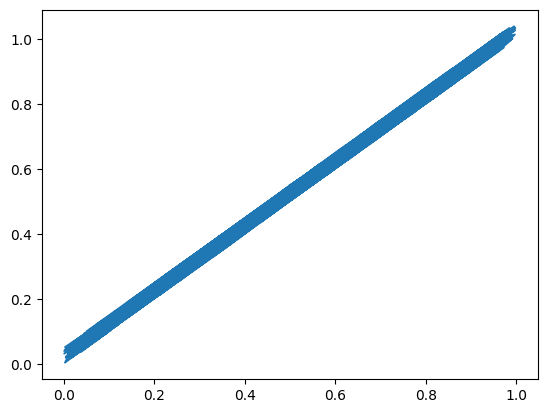

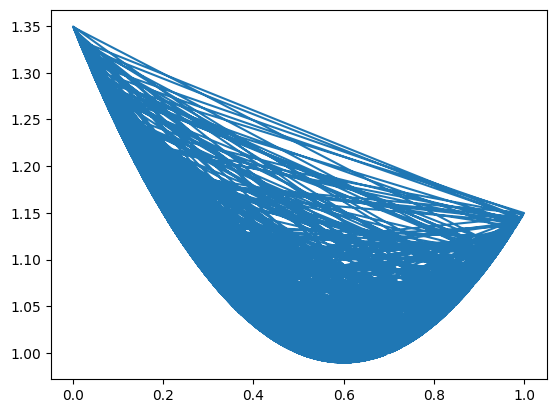

In [10]:
[x1,y1] = generate_dataset1()
[x2,y2] = generate_dataset2()

plt.figure()
plt.plot(x1,y1)
plt.show()

plt.figure()
plt.plot(x2,y2)
plt.show()

In [11]:
#I used straigt forward method to find the co variance and it took approx 5 min ot calculate for the mnist dataset. So I used numpy function to calculate it.

#I then calculated the covariance without a for loop and it really reducesd the time to approx 2sec.

def pca(data):
    #data is a mxn matrix, with each column represents each variable and each row representing data point.

    # cov_mat = np.zeros((data.shape[1],data.shape[1]))
    # for i in range(cov_mat.shape[0]):
    #     for j in range(cov_mat.shape[1]):
    #         tmp = data[:,i] - np.mean(data[:,i])
    #         tmp *= data[:,j] - np.mean(data[:,j])
    #         cov_mat[i,j] = np.mean(tmp)

    #cov_mat = np.cov(data.T) # For np.cov function, the matrix M has a variable in a row and single data point of all variables in a column.
    
    # NEW method to solve Covariance matrix, without using a for loop.
    column_mean = np.mean(data,axis=0)
    datasubmean = data - column_mean
    cov_mat = (datasubmean.T)@(datasubmean)
    cov_mat /= data.shape[0]

    eigval , eigvec = np.linalg.eig(cov_mat)

    # Below code is for sorting the eigen vectors.
    eigdict={}
    for i in range(len(eigval)):
        eigdict[eigval[i]] = eigvec[:,i]
    
    sorted_eigvals = sorted(eigval,reverse=True)
    sorted_eigvec = np.array([eigdict[i] for i in sorted_eigvals])

    #tmp is the the data in pca system
    tmp = data@(sorted_eigvec.T)
    return tmp
  

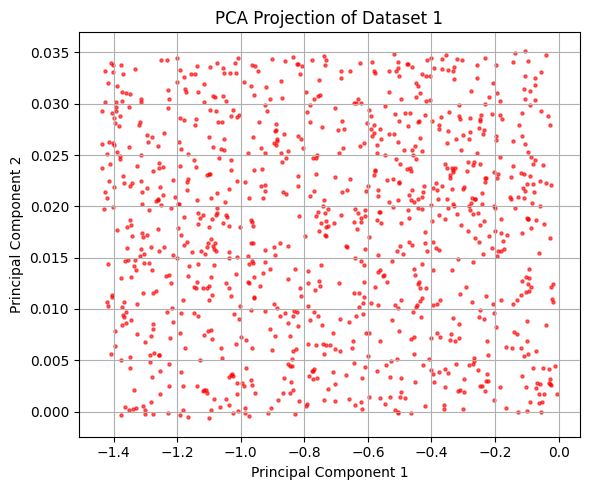

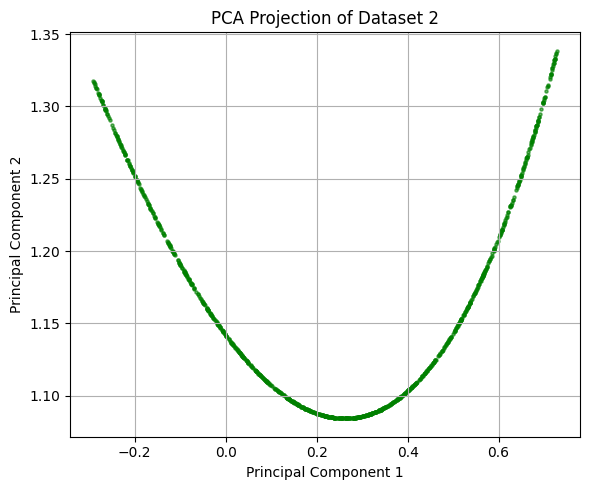

In [18]:
dt1 = np.array([x1,y1]).T
dt2 = np.array([x2,y2]).T
# Project Dataset 1 onto its PCA space
pca_dt1 = pca(dt1)
plt.figure(figsize=(6, 5))
plt.scatter(pca_dt1[:, 0], pca_dt1[:, 1], s=5, alpha=0.6, c='red')
plt.title("PCA Projection of Dataset 1")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

# Project Dataset 2 onto its PCA space
pca_dt2 = pca(dt2)
plt.figure(figsize=(6, 5))
plt.scatter(pca_dt2[:, 0], pca_dt2[:, 1], s=5, alpha=0.6, c='green')
plt.title("PCA Projection of Dataset 2")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
#for mnist dataset
from datasets import load_dataset

ds=load_dataset("ylecun/mnist")
data = ds['train']
x = np.array(data['image'])

print(x.shape)


(60000, 28, 28)


In [16]:
#converting 60000x28x28 data into 60000x(28*28)
dt2 = np.reshape(x,(x.shape[0],x.shape[1]*x.shape[2]))
print(dt2.shape)

pca_mnist = pca(dt2)
print(pca_mnist.shape)

(60000, 784)
(60000, 784)


In [17]:
dt2 = np.reshape(x,(x.shape[0],x.shape[1]*x.shape[2]))
print(dt2.shape)

from sklearn.decomposition import PCA # I used this to verify the time taken by efficient algorithm.
pca_mnist2 = PCA().fit_transform(dt2)

print(pca_mnist2.shape)

(60000, 784)
(60000, 784)


In [19]:
pip freeze > requirements.txt


Note: you may need to restart the kernel to use updated packages.
